In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bestsellers.csv")


In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
df.drop_duplicates(inplace=True)

df.rename(
    columns={
        "Name": "Title",
        "Year": "Publication Year",
        "User Rating": "Rating"
    },
    inplace=True
)

df["Price"] = df["Price"].astype(float)


In [8]:
author_counts = df["Author"].value_counts()
author_counts.head(10)


,count
Author,
Jeff Kinney,12
Suzanne Collins,11
Gary Chapman,11
Rick Riordan,11
American Psychological Association,10
Dr. Seuss,9
Gallup,9
Rob Elliott,8
Bill O'Reilly,7


In [9]:
df.groupby("Genre")["Rating"].mean()

,Rating
Genre,
Fiction,4.648333
Non Fiction,4.595161


In [10]:
df["Rating"].value_counts().sort_index()


,count
Rating,
3.3,1
3.6,1
3.8,2
3.9,3
4.0,14
4.1,6
4.2,8
4.3,25
4.4,38


In [11]:
df.groupby("Genre")["Price"].median()


,Price
Genre,
Fiction,9.0
Non Fiction,12.0


In [12]:
df[["Price", "Rating"]].corr()


,Price,Rating
Price,1.000000,-0.133086
Rating,-0.133086,1.000000


In [13]:
df.sort_values("Reviews", ascending=False)[
    ["Title", "Author", "Reviews", "Rating"]
].head(10)


,Title,Author,Reviews,Rating
534,Where the Crawdads Sing,Delia Owens,87841,4.8
382,The Girl on the Train,Paula Hawkins,79446,4.1
383,The Girl on the Train,Paula Hawkins,79446,4.1
33,Becoming,Michelle Obama,61133,4.8
32,Becoming,Michelle Obama,61133,4.8
136,Gone Girl,Gillian Flynn,57271,4.0
135,Gone Girl,Gillian Flynn,57271,4.0
137,Gone Girl,Gillian Flynn,57271,4.0
368,The Fault in Our Stars,John Green,50482,4.7
365,The Fault in Our Stars,John Green,50482,4.7


In [16]:
df.groupby("Publication Year")["Title"].count()


,Title
Publication Year,
2009,50
2010,50
2011,50
2012,50
2013,50
2014,50
2015,50
2016,50
2017,50


In [17]:
df.groupby("Publication Year")["Title"].count().sort_index()


,Title
Publication Year,
2009,50
2010,50
2011,50
2012,50
2013,50
2014,50
2015,50
2016,50
2017,50


<Axes: xlabel='Publication Year'>

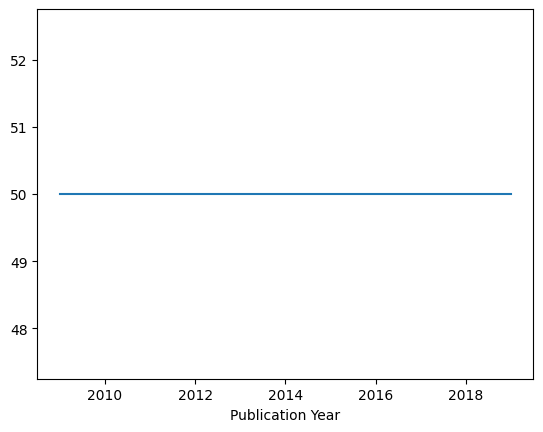

In [18]:
df.groupby("Publication Year")["Title"].count().plot(kind="line")


## Amazon Bestsellers Data Analysis

### Objective
To analyze Amazon bestselling books and identify trends in ratings, reviews, pricing, genres, and publication years using Python.

### Tools Used
- Python
- Pandas
- Matplotlib
- Google Colab

### Key Insights
- Fiction books have slightly higher average ratings than Non-Fiction books
- Non-Fiction books are priced higher on average
- Most bestsellers fall in the 4.5–4.9 rating range
- Price and rating show very weak correlation
- Highly reviewed books are not always the highest rated
- Bestseller count increased over years while ratings remained stable

### Conclusion
This analysis highlights how user preferences, pricing, and genre influence Amazon bestseller trends.
